<a href="https://colab.research.google.com/github/deysi-caraballo/tfm/blob/main/TFM_entrenamiento_ML_preguntas_crudas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación del dataset crudo en formato Parquet

En primer lugar, nos preparamos para descargar el fichero Parquet de datos crudos desde Google Cloud Storage hasta nuestro sistema de ficheros local de Google Colab

In [ ]:
import os
import google.auth

In [ ]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = '/content/sa.json'

In [ ]:
!export GOOGLE_APPLICATION_CREDENTIALS=/content/sa.json

In [ ]:
!echo $GOOGLE_APPLICATION_CREDENTIALS

/content/sa.json


In [ ]:
!gcloud config set project '800463162730' #'snappy-guard-389922'

Are you sure you wish to set property [core/project] to 800463162730?

Do you want to continue (Y/n)?  Y

Updated property [core/project].


In [ ]:
!gcloud auth login --cred-file=$GOOGLE_APPLICATION_CREDENTIALS


You are already authenticated with 
'tfm-pasalera@snappy-guard-389922.iam.gserviceaccount.com'.
Do you wish to proceed and overwrite existing credentials?

Do you want to continue (Y/n)?  Y


Authenticated with service account credentials for: [tfm-pasalera@snappy-guard-389922.iam.gserviceaccount.com].
Your current project is [800463162730].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


In [ ]:
!gsutil cp gs://dataprep-staging-f1ae6292-d58f-4922-af3a-1cf0b5492123/mendoza.dc6@gmail.com/jobrun/preguntas-crudo-aumentado.parquet /content/preguntas-crudo.parquet

Copying gs://dataprep-staging-f1ae6292-d58f-4922-af3a-1cf0b5492123/mendoza.dc6@gmail.com/jobrun/preguntas-crudo-aumentado.parquet...
\ [1 files][ 14.4 MiB/ 14.4 MiB]                                                
Operation completed over 1 objects/14.4 MiB.                                     


# Lectura del fichero Parquet como DataFrame de pandas

In [ ]:
!pip install pandas

In [ ]:
!pip install python-snappy

In [ ]:
import pandas as pd

preguntas_df = pd.read_parquet('/content/preguntas-crudo.parquet', engine='pyarrow')

In [ ]:
preguntas_df = preguntas_df[['texto', 'id_ministerio', 'split']]
preguntas_df

,texto,id_ministerio,split
0,Grupo Parlamentario Socialista de Cortes Gener...,5,train
1,C.DIP 80898 20/03/2018 19:46 CS Congreso de lo...,10,train
2,C.DIP 79938 14/03/2018 17:32 A LA MESA DEL CON...,5,train
3,BRE 6 SENADO AUTOR: SENADO XII LEGISLATURA REG...,11,train
4,BRE 6 SENADO AUTOR: SENADO XII LEGISLATURA REG...,11,train
...,...,...,...
7608,Grupo Parlamentario Socialista de Cortes Gener...,13,test
2915,C. DIP 84160 11/04/2018 18:22 GRUPO PARLAMENTA...,5,test
7874,BRE 6 SENADO AUTOR: SENADO XII LEGISLATURA REG...,14,test
3582,Grupo Parlamentario Socialista de Cortes Gener...,5,test


Definimos la lista de ministerios para que sea mostrada posteriormente en los reportes de evaluación

In [ ]:
lista_ministerios = ['M. de Defensa',\
                     'M. de Justicia',\
                     'M. del Interior',\
                     'M. de Fomento',\
                     'M. de Asuntos Exteriores y de Cooperación',\
                     'M. de Hacienda y Función Pública',\
                     'M. de Empleo y Seguridad Social',\
                     'M. de Economía, Industria y Competitividad',\
                     'M. de Energía, Turismo y Agenda Digital',\
                     'M. de Agricultura y Pesca, Alimentación y Medio Ambiente',\
                     'M. de la Presidencia y para las Administraciones Territoriales',\
                     'M. de Sanidad, Servicios Sociales e Igualdad',\
                     'M. de Educación, Cultura y Deporte']

# Análisis del dataset crudo

Antes de continuar, vamos a verificar que los documentos están correctamente balanceados para todos los posibles ministerios. Para ello, vamos a representar gráficamente cuántos documentos hay en nuestro conjunto de entrenamiento por cada posible ministerio.

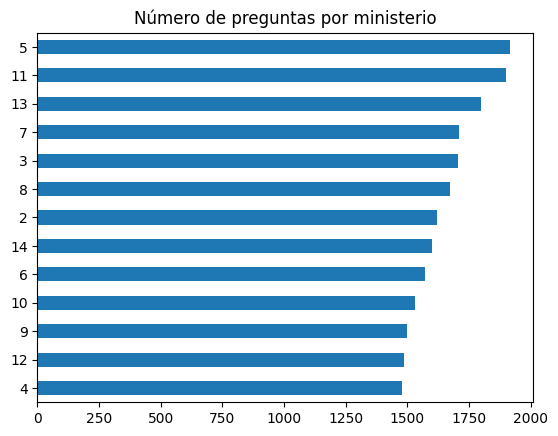

In [ ]:
import matplotlib.pyplot as plt

preguntas_df[preguntas_df['split'] == 'train']["id_ministerio"].value_counts(ascending=True).plot.barh()
plt.title("Número de preguntas por ministerio")
plt.rcParams['figure.figsize'] = [20, 50]
plt.show()

Efectivamente, el trabajo realizado en el notebook de optimización del dataset ha sido bueno y ha producido un dataset de entrenamiento equilibrado.

Separamos ahora nuestros datasets de entrenamiento y test en dos dataframes diferentes

In [ ]:
train_df = preguntas_df[preguntas_df['split'] == 'train']
test_df = preguntas_df[preguntas_df['split'] == 'test']

In [ ]:
train_df.describe()

,id_ministerio
count,21499.000000
mean,8.002930
std,3.742359
min,2.000000
25%,5.000000
50%,8.000000
75%,11.000000
max,14.000000


In [ ]:
print(train_df)

                                                   texto  id_ministerio  split
0      Grupo Parlamentario Socialista de Cortes Gener...              5  train
1      C.DIP 80898 20/03/2018 19:46 CS Congreso de lo...             10  train
2      C.DIP 79938 14/03/2018 17:32 A LA MESA DEL CON...              5  train
3      BRE 6 SENADO AUTOR: SENADO XII LEGISLATURA REG...             11  train
4      BRE 6 SENADO AUTOR: SENADO XII LEGISLATURA REG...             11  train
...                                                  ...            ...    ...
21494  bre 6 y autor : senado xii legislatura registr...             12  train
21495  bre 6 senado autor : senado xii legislatura re...             12  train
21496  bre 6 senado autor : senado xii legislatura re...             12  train
21497  c. 6 90559 23 / 05 / 2018 07 : 09 partit democ...             12  train
21498  bre 6 senado autor : senado xii legislatura re...             12  train

[21499 rows x 3 columns]


In [ ]:
test_df.describe()

,id_ministerio
count,1589.000000
mean,7.308999
std,3.543476
min,2.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,14.000000


In [ ]:
print(test_df)

                                                  texto  id_ministerio split
5182  Grupo Parlamentario Socialista de Cortes Gener...              8  test
4486  BRE 6 SENADO AUTORES: SENADO XII LEGISLATURA R...              7  test
6217  BRE 6 SENADO AUTOR: SENADO XII LEGISLATURA REG...             11  test
4702  BRE 6 SENADO AUTORES: SENADO XII LEGISLATURA R...              8  test
619   BRE 6 SENADO AUTOR: SENADO XII LEGISLATURA REG...              3  test
...                                                 ...            ...   ...
7608  Grupo Parlamentario Socialista de Cortes Gener...             13  test
2915  C. DIP 84160 11/04/2018 18:22 GRUPO PARLAMENTA...              5  test
7874  BRE 6 SENADO AUTOR: SENADO XII LEGISLATURA REG...             14  test
3582  Grupo Parlamentario Socialista de Cortes Gener...              5  test
4126  BRE 6 SENADO AUTORES: SENADO XII LEGISLATURA R...              7  test

[1589 rows x 3 columns]


# Entrenando un modelo de clasificación

Para desarrollar el ejercicio vamos a entrenar un modelo de clasificación mediante diferentes variantes de un clasificador bayesiano ingenuo (Naïve Bayes).

En general, un clasificador bayesiano ingenuo, como todos los modelos de machine learning, necesitan convertir todos los datos de entrada en números, particularmente en vectores de números. Esto es lo que se denomina "vectorizar", en nuestro caso, un texto de entrada. Existen diferentes formas de vectorizar, pero nosotros nos vamos a centrar en una: el indicador TF-IDF, que mide la relevancia de los términos (mediante un TfidfVectorizer).

Sin embargo, las frases contienen muchos elementos que pueden generar ruido, al margen de que cada fase es, en este momento, una cadena de texto. Para que un vectorizador pueda hacer su trabajo siempre se apoya en un conjunto de parámetros clave:

* Una lista de palabras del lenguaje que no aportan valor, lo que denomimos "stop words".
* Un tamaño mínimo y máximo de los n-gramas que deseamos tener en cuenta (por ejemplo, tokens individuales, conjuntos de 2 tokens y conjuntos de 3 tokens). Para nuestro caso usaremos n-gramas de entre 1 y 3 tokens.
* Un tokenizador, es decir, una función que, a partir de las cadenas de texto, extraiga los diferentes términos (tokens)

## Opción 1: Algoritmo: Naïve Bayes multinomial - Vectorizador: `TfidfVectorizer`

In [ ]:
!pip install -U scikit-learn

  Using cached scikit_learn-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


Comenzamos con la tokenización y vectorización de los textos:

In [ ]:
!pip install -U pip setuptools wheel

In [ ]:
!pip install -U 'spacy[cuda-autodetect]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 52.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 MB 18.4 MB/s eta 0:00:00
  Created wheel for cupy-wheel: filename=cupy_wheel-12.1.0.post1-py3-none-any.whl size=1056 sha256=3355267dbba08ed328e87f316deccf55554b3256294ae8355f1a2c731a93291c
  Stored in directory: /root/.cache/pip/wheels/6c/52/1e/81ea89a4b892492c8fd6ab681d6eb0eef1f95c65d4541e746d
Successfully built cupy-wheel
  Attempting uninstall: cupy-cuda11x
    Found existing installation: cupy-cuda11x 11.0.0
    Uninstalling cupy-cuda11x-11.0.0:
      Successfully uninstalled cupy-cuda11x-11.0.0
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.4
    Uninstalling spacy-3.5.4:
      Successfully uninstalled spacy-3.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflic

In [ ]:
!python -m spacy download es_dep_news_trf

2023-07-13 18:09:12.657670: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-13 18:09:12.713103: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-13 18:09:13.782477: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.2/410.2 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.8/190.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 79.5 MB/s eta 0:00:00
     ━━━━

In [ ]:
import nltk
import nltk.data
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.es.stop_words import STOP_WORDS

nltk.download('punkt')

tfidfv = TfidfVectorizer(stop_words=list(STOP_WORDS), ngram_range = (1, 3), tokenizer = word_tokenize)

X1_train = tfidfv.fit_transform(train_df['texto'])
X1_test = tfidfv.transform(test_df['texto'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


`X1_train` y `X1_test` son matrices donde cada fila representa un texto del conjunto de entrenamiento y evaluación, respectivamente, y cada columna representa uno de los posibles n-gramas:

In [ ]:
X1_train.shape

(21499, 1042653)

Y almacenamos en una Serie de pandas el conjunto de etiquetas (columna `id_ministerio`) tanto del dataset de entrenamiento como del de evaluación, pero transformadas a cadena de texto.

Esto lo hacemos así porque más adelante, para evaluar nuestro modelo, necesitamos que las etiquetas sean cadenas de texto, y en este momento son números enteros

In [ ]:
y_train = train_df['id_ministerio'].apply(lambda x: str(x))
y_test = test_df['id_ministerio'].apply(lambda x: str(x))

Vamos ahora a intentar encontrar el valor más apropiado para alguno de los hiperparámetros del algoritmo de entrenamiento.

Para ello podemos utilizar GridSearchCV, una clase de scikit-learn que implementa la búsqueda exhaustiva por rejilla, que permite buscar los mejores hiperparámetros para un modelo utilizando validación cruzada. En nuestro caso, haremos un cálculo de validación cruzada con 6 divisiones (`cv=6`), usando los valores de alpha para la regilla de 0.1, 1 y 10.

Y para poder aplicarlo hay que indicarle, previamente, el tipo de algoritmo de clasificación que vamos a utilizar (en nuestro caso, comenzaremos con un clasificador Naïve Bayes multinomial, implementado por la clase `MultinomialNB` de scikit-learn.

El parámetro `verbose=3` nos asegura que se mostrará información detallada de lo que hacemos.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

clf_multinomial_nb = MultinomialNB()

param_grid = {'alpha': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(clf_multinomial_nb, param_grid, cv=10, verbose=3)
grid_search.fit(X1_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
val_score = grid_search.score(X1_test, y_test)
print("Validation accuracy:", val_score)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END .......................alpha=0.01;, score=0.858 total time=   0.8s
[CV 2/10] END .......................alpha=0.01;, score=0.927 total time=   0.8s
[CV 3/10] END .......................alpha=0.01;, score=0.954 total time=   0.8s
[CV 4/10] END .......................alpha=0.01;, score=0.951 total time=   0.8s
[CV 5/10] END .......................alpha=0.01;, score=0.964 total time=   0.8s
[CV 6/10] END .......................alpha=0.01;, score=0.954 total time=   0.8s
[CV 7/10] END .......................alpha=0.01;, score=0.955 total time=   0.8s
[CV 8/10] END .......................alpha=0.01;, score=0.960 total time=   0.8s
[CV 9/10] END .......................alpha=0.01;, score=0.955 total time=   0.8s
[CV 10/10] END ......................alpha=0.01;, score=0.960 total time=   0.8s
[CV 1/10] END ........................alpha=0.1;, score=0.803 total time=   0.8s
[CV 2/10] END ........................alpha=0.1;

Y ahora que tenemos identificado el valor óptimo del hiperparámetro `alpha`, procedemos a entrenar nuestro modelo:

In [ ]:
clf_multinomial_nb = MultinomialNB(alpha=grid_search.best_params_['alpha'])

clf_multinomial_nb.fit(X1_train, y_train)

test_score = clf_multinomial_nb.score(X1_test, y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.8030207677784771


Mostramos, finalmente, los resultados de nuestro modelo para cada posible ministerio y de manera global:

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf_multinomial_nb.predict(X1_test)

# Para las posibles etiquetas, solo se contemplan los valores comprendidos entre 2 y 14,
# ambos incluidos, pero expresados como cadena de texto
report = classification_report(y_test, y_pred, labels=[str(x) for x in range(2, 15)], target_names=lista_ministerios)

print(report)

                                                                precision    recall  f1-score   support

                                                 M. de Defensa       0.86      0.82      0.84        45
                                                M. de Justicia       0.72      0.46      0.56        85
                                               M. del Interior       0.79      0.91      0.84       370
                                                 M. de Fomento       0.80      0.88      0.83       240
                     M. de Asuntos Exteriores y de Cooperación       0.79      0.67      0.72        33
                              M. de Hacienda y Función Pública       0.87      0.80      0.84       142
                               M. de Empleo y Seguridad Social       0.65      0.86      0.74       140
                    M. de Economía, Industria y Competitividad       0.81      0.42      0.55        31
                       M. de Energía, Turismo y Agenda Digital 

La verdad es que el modelo ha funcionado razonablemente bien, con valores relativamente altos de F1 tanto la mayoría de los ministerios (pero con excepciones, como el caso del Ministerio de la Presidencia) como para la F1-macro y la F1-ponderada.

## Opción 2: Algoritmo: Naïve Bayes Bernuilli - Vectorizador: `TfidfVectorizer`

Vamos a probar el resultado del algoritmo de Naïve Bayes de Bernuilli con el vectorizador basado en TF-IDF.

Seguimos los pasos análogos a las opciones anteriores:

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV

clf_bernoulli_nb = BernoulliNB()

param_grid = {'alpha': [0.01, 0.1, 1, 10]}
grid_search2 = GridSearchCV(clf_bernoulli_nb, param_grid, cv=10, verbose=3)
grid_search2.fit(X1_train, y_train)

print("Best hyperparameters:", grid_search2.best_params_)
val_score = grid_search2.score(X1_test, y_test)
print("Validation accuracy:", val_score)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END .......................alpha=0.01;, score=0.787 total time=   1.2s
[CV 2/10] END .......................alpha=0.01;, score=0.882 total time=   1.2s
[CV 3/10] END .......................alpha=0.01;, score=0.923 total time=   1.2s
[CV 4/10] END .......................alpha=0.01;, score=0.922 total time=   1.2s
[CV 5/10] END .......................alpha=0.01;, score=0.939 total time=   1.2s
[CV 6/10] END .......................alpha=0.01;, score=0.932 total time=   1.2s
[CV 7/10] END .......................alpha=0.01;, score=0.925 total time=   1.2s
[CV 8/10] END .......................alpha=0.01;, score=0.940 total time=   1.2s
[CV 9/10] END .......................alpha=0.01;, score=0.925 total time=   1.2s
[CV 10/10] END ......................alpha=0.01;, score=0.937 total time=   1.2s
[CV 1/10] END ........................alpha=0.1;, score=0.748 total time=   1.2s
[CV 2/10] END ........................alpha=0.1;

Y ahora que tenemos identificado el valor óptimo del hiperparámetro `alpha`, procedemos a entrenar nuestro modelo:

In [ ]:
clf_bernoulli_nb = BernoulliNB(alpha=grid_search2.best_params_['alpha'])

clf_bernoulli_nb.fit(X1_train, y_train)

test_score = clf_bernoulli_nb.score(X1_test, y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.7507866582756451


Mostramos, finalmente, los resultados de nuestro modelo para cada posible ministerio y de manera global:

In [ ]:
y_pred = clf_bernoulli_nb.predict(X1_test)
report2 = classification_report(y_test, y_pred, labels=[str(x) for x in range(2, 15)], target_names=lista_ministerios)

print(report2)

                                                                precision    recall  f1-score   support

                                                 M. de Defensa       0.93      0.56      0.69        45
                                                M. de Justicia       0.77      0.39      0.52        85
                                               M. del Interior       0.66      0.94      0.78       370
                                                 M. de Fomento       0.79      0.83      0.81       240
                     M. de Asuntos Exteriores y de Cooperación       0.88      0.42      0.57        33
                              M. de Hacienda y Función Pública       0.92      0.75      0.83       142
                               M. de Empleo y Seguridad Social       0.54      0.81      0.65       140
                    M. de Economía, Industria y Competitividad       0.89      0.26      0.40        31
                       M. de Energía, Turismo y Agenda Digital 

El rendimiento del algoritmo ha sido en este caso sensiblemente peor, tanto en la precisión global como en la métrica F1 en todas sus visiones: por categoría, macro y ponderada.

## Opción 3: Algoritmo: Complement Naïve Bayes - Vectorizador: `TfidfVectorizer`

Acabamos nuestro ciclo de experimentos de machine learning basadas en Naïve Bayes usando el algoritmo Complement Naïve Bayes y el vectorizador basado en TF-IDF, como en los casos anteriores

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
import numpy as np

clf_complement_nb = ComplementNB()

param_grid = {'alpha': np.logspace(1,-9, num=110)}
grid_search4 = GridSearchCV(clf_complement_nb, param_grid, cv=6, verbose=3)
grid_search4.fit(X1_train, y_train)

print("Best hyperparameters:", grid_search4.best_params_)
val_score = grid_search4.score(X1_test, y_test)
print("Validation accuracy:", val_score)

Fitting 6 folds for each of 110 candidates, totalling 660 fits
[CV 1/6] END ........................alpha=10.0;, score=0.711 total time=   0.9s
[CV 2/6] END ........................alpha=10.0;, score=0.782 total time=   0.9s
[CV 3/6] END ........................alpha=10.0;, score=0.790 total time=   0.9s
[CV 4/6] END ........................alpha=10.0;, score=0.779 total time=   0.9s
[CV 5/6] END ........................alpha=10.0;, score=0.793 total time=   0.9s
[CV 6/6] END ........................alpha=10.0;, score=0.783 total time=   0.9s
[CV 1/6] END ...........alpha=8.095746126715333;, score=0.722 total time=   0.9s
[CV 2/6] END ...........alpha=8.095746126715333;, score=0.795 total time=   0.9s
[CV 3/6] END ...........alpha=8.095746126715333;, score=0.802 total time=   0.9s
[CV 4/6] END ...........alpha=8.095746126715333;, score=0.792 total time=   0.9s
[CV 5/6] END ...........alpha=8.095746126715333;, score=0.806 total time=   0.9s
[CV 6/6] END ...........alpha=8.09574612671533

Y ahora que tenemos identificado el valor óptimo del hiperparámetro `alpha`, procedemos a entrenar nuestro modelo:

In [ ]:
clf_complement_nb = ComplementNB(alpha=grid_search4.best_params_['alpha'])

clf_complement_nb.fit(X1_train, y_train)

test_score = clf_complement_nb.score(X1_test, y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.8665827564505979


Finalizamos el análisis de esta opción con el reporte habitual:

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf_complement_nb.predict(X1_test.toarray())
report3 = classification_report(y_test, y_pred, labels=[str(x) for x in range(2, 15)], target_names=lista_ministerios)

print(report3)

                                                                precision    recall  f1-score   support

                                                 M. de Defensa       0.80      0.91      0.85        45
                                                M. de Justicia       0.82      0.64      0.72        85
                                               M. del Interior       0.91      0.91      0.91       370
                                                 M. de Fomento       0.86      0.93      0.89       240
                     M. de Asuntos Exteriores y de Cooperación       0.72      0.79      0.75        33
                              M. de Hacienda y Función Pública       0.92      0.85      0.88       142
                               M. de Empleo y Seguridad Social       0.83      0.88      0.85       140
                    M. de Economía, Industria y Competitividad       0.85      0.55      0.67        31
                       M. de Energía, Turismo y Agenda Digital 

Esta variante de clasificador Naïve Bayes mejora ligeramente la versión multinomial a la vista de la puntuación F1, tanto para las categorías individuales (con la excepción del Ministerio de Presidencia) como para la versión macro (de 0.71 sube a 0.78) y la versión ponderada (de 0.80 sube a 0.86).